In [21]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

waze_cleaned = pd.read_csv("../data/waze_cleaned.csv")

In [22]:
waze_cleaned.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


**Univariate analysis**

In [23]:
waze_cleaned.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Should I consider renaming the "label" column to "churn" or something similar? Should I convert to boolean?


In [ ]:
#convert label column datatype to boolean

#df_indexed_bool = df_indexed['label'].apply(lambda x: True if x == 'churned' else False)
#Ended up not using this, could convert if necessary. 

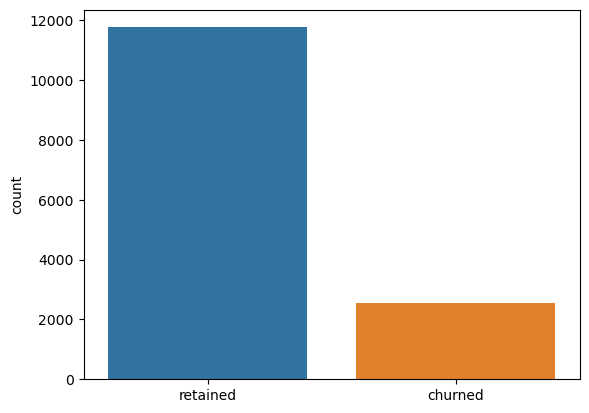

In [33]:
sns.countplot(x = waze_cleaned["label"])
plt.xlabel("");

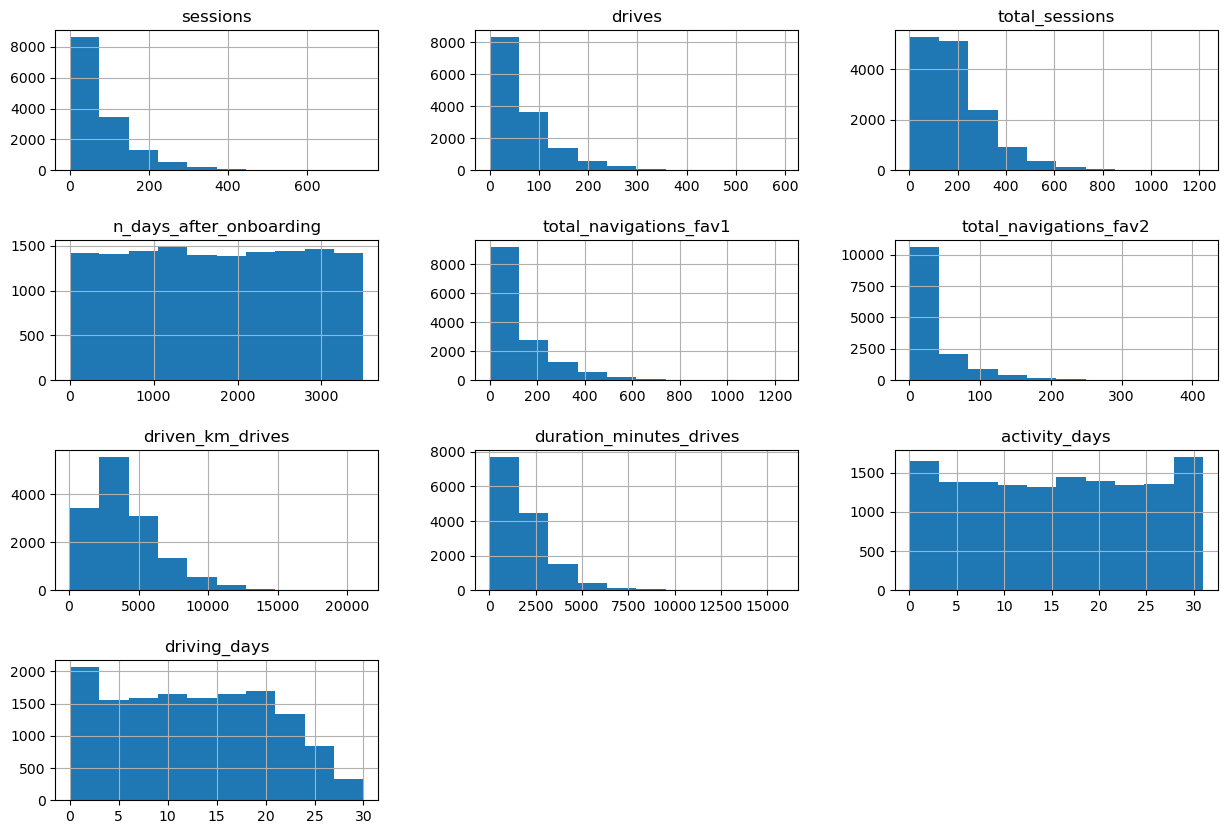

In [24]:
waze_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

I know this boxplot with a shared y axis doesn't work because of relatively extreme value ranges in a couple feautures. Is it reasonable to examine boxplots of all columns to check for outliers? If so, how should I approach the plots?

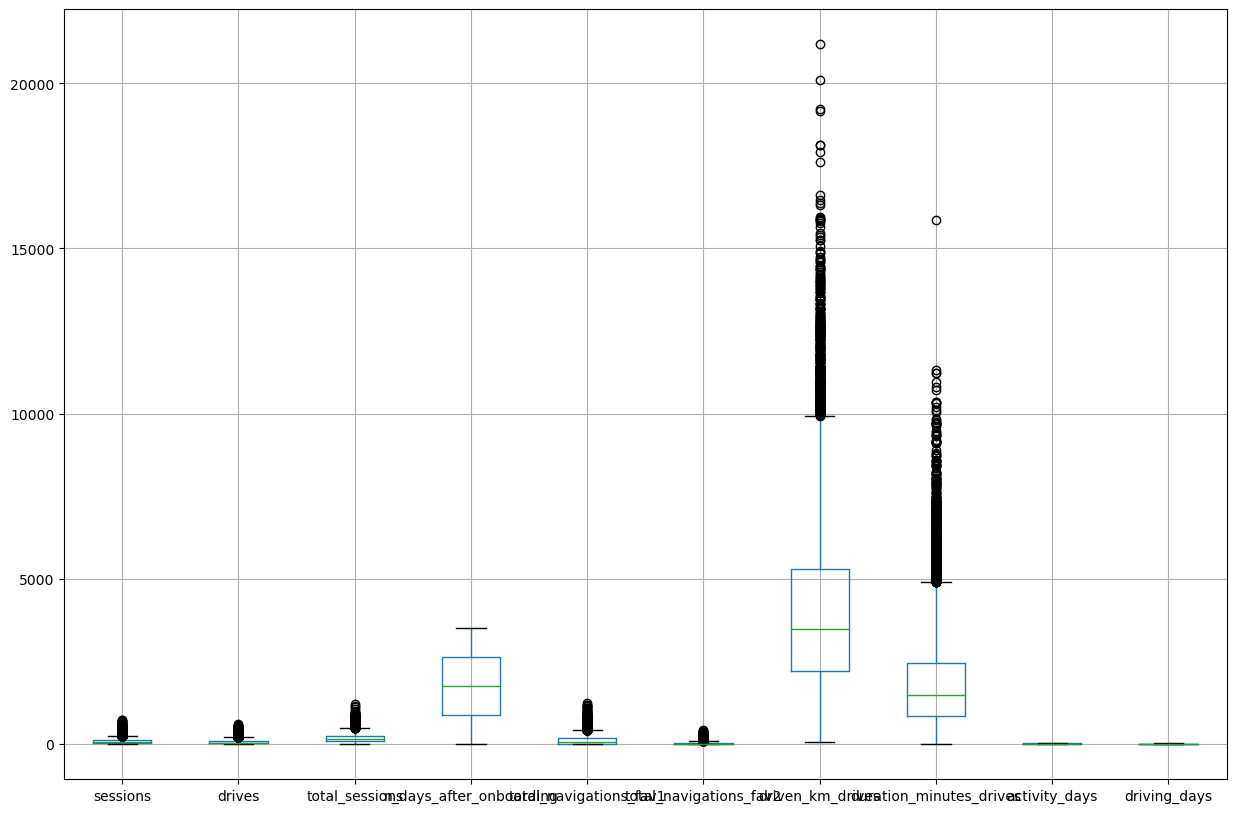

In [26]:
waze_cleaned.boxplot(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

**Bivariate analysis** seaborn facetgrid of scatterplots to compare features. And heatmap. And look at Pearson's r values? https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15 for help with pearson's r

In [35]:
waze_cleaned.corr()

/var/folders/b7/l_8fhdpn5t3_f51_qw6xkht80000gn/T/ipykernel_11703/2411446252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  waze_cleaned.corr()


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
sessions,1.000000,0.996843,0.590265,0.006441,0.005252,0.005220,0.003815,-0.005800,0.024594,0.020228
drives,0.996843,1.000000,0.588118,0.006001,0.004551,0.006896,0.003708,-0.005376,0.024324,0.019975
total_sessions,0.590265,0.588118,1.000000,0.006180,-0.000047,0.007659,0.001690,-0.001457,0.012932,0.009798
n_days_after_onboarding,0.006441,0.006001,0.006180,1.000000,-0.004536,-0.006433,-0.005056,-0.010715,-0.009418,-0.007321
total_navigations_fav1,0.005252,0.004551,-0.000047,-0.004536,1.000000,0.003734,-0.006262,0.005619,0.010318,0.010024
total_navigations_fav2,0.005220,0.006896,0.007659,-0.006433,0.003734,1.000000,0.000159,-0.005326,-0.004836,0.000938
driven_km_drives,0.003815,0.003708,0.001690,-0.005056,-0.006262,0.000159,1.000000,0.697977,-0.004196,-0.007099
duration_minutes_drives,-0.005800,-0.005376,-0.001457,-0.010715,0.005619,-0.005326,0.697977,1.000000,-0.003898,-0.006239
activity_days,0.024594,0.024324,0.012932,-0.009418,0.010318,-0.004836,-0.004196,-0.003898,1.000000,0.947687
driving_days,0.020228,0.019975,0.009798,-0.007321,0.010024,0.000938,-0.007099,-0.006239,0.947687,1.000000


/var/folders/b7/l_8fhdpn5t3_f51_qw6xkht80000gn/T/ipykernel_11703/2471250131.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(waze_cleaned.corr(), annot = True, cmap='coolwarm')


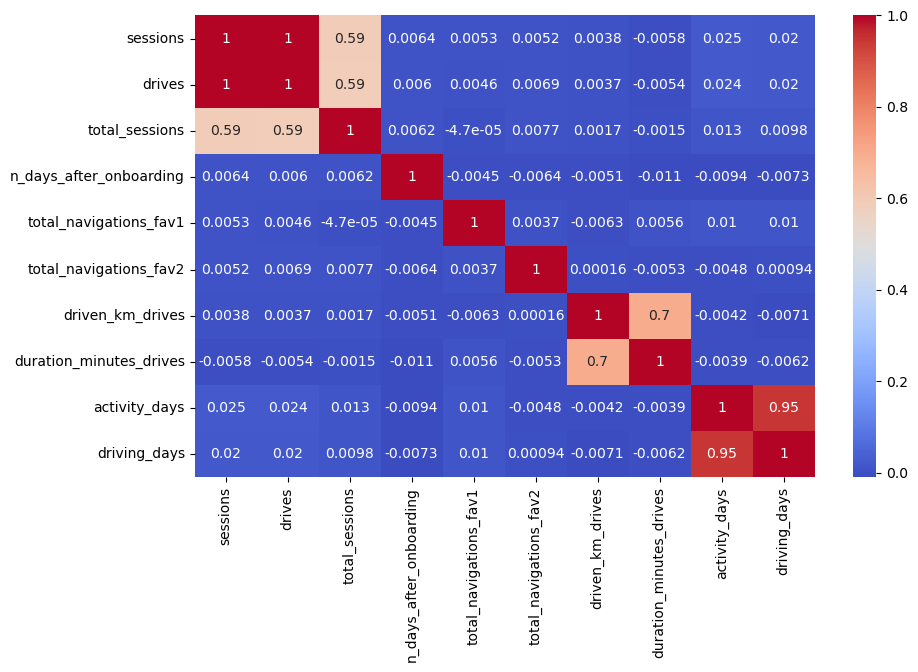

In [39]:
# Make a heatmap of the data 
plt.figure(figsize= (10, 6))
sns.heatmap(waze_cleaned.corr(), annot = True, cmap='coolwarm')
plt.show()